|               | actual cat | actual dog |
|:------------  |-----------:|-----------:|
| predicted cat |         34 |          7 |
| predicted dog |         13 |         46 |



In [ ]:
true_positives = 34
true_negatives = 46
false_positives = 7
false_negatives = 13

# number of TRUE predictions (pos/neg) / total observations
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

# true positives / (all actual positives)
recall = true_positives / (true_positives + false_negatives)

# true positives / (all actual positive predictions)
precision = true_positives / (true_positives + false_positives)

# True Negative Rate
# true negatives / (all actual negatives) == TN / (TN + FP)
specificity = true_negatives / (true_negatives + false_positives)

print("Cat-classifier (where 'cat' is the positive prediction)")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Specificity:", specificity)

You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

Use the predictions dataset and pandas to help answer the following questions:

An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?
Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data

In [ ]:
c3_file = 'https://ds.codeup.com/data/c3.csv'
c3 = pd.read_csv(c3_file)

In [ ]:
c3.head()

In [ ]:
c3.actual.value_counts()

In [ ]:
pd.crosstab(c3.model1,c3.actual)

In [ ]:
c3["baseline"] = c3.actual.value_counts().index[0]


The positive case is the presence of a defect

Quality Control, our internal customer, wants the metric to identify as many defective ducks as possible

Our best metric for Quality Control here is recall

Use recall when missing actual positive cases is expensive.

Optimizing for recall avoids false negatives (misses)


In [ ]:
positive = "Defect"

In [ ]:
# Subset.actual == "Defect" (we've defined Defect as our positive)
subset = c3[c3.actual == positive]

# Trues are True Positives from Model1 predictions
# True Positive + False Negatives = Total number of actual positives
model_recall = (subset.actual == subset.model1).mean()
baseline_recall = (subset.baseline == subset.actual).mean()


In [ ]:
subset.actual

In [ ]:
subset.model1

In [ ]:
print("Model 1")
print(f"Model recall: {model_recall:.2%}")
print(f"Baseline recall: {baseline_recall:.2%}")

In [4]:
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [5]:
tips = sns.load_dataset('tips')


Summarize

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

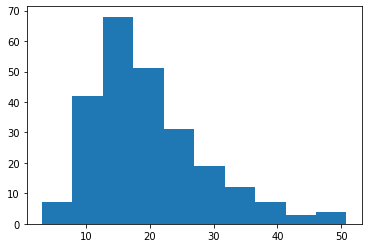

In [8]:
plt.hist(tips.total_bill)

(array([  4.,   0., 156.,   0.,  38.,   0.,  37.,   0.,   5.,   4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

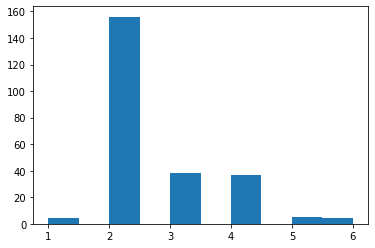

In [9]:
plt.hist(tips['size'])

In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [11]:
print(tips.sex.value_counts())
print(tips.smoker.value_counts())
print(tips.day.value_counts())
print(tips.time.value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


Prepare
    
    get_dummies()

    remove_duplicates

    create new target variable: low_tip

    other new features/variables?

In [12]:
tips = tips.drop_duplicates()

In [13]:
tips_dummies = pd.get_dummies(tips[['sex','day','smoker','time']], drop_first= True)

In [14]:
tips = pd.concat([tips, tips_dummies], axis=1)

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,day_Fri,day_Sat,day_Sun,smoker_No,time_Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0,1,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,0,1,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,0,1,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,0,1,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,0,1,1,1


In [16]:
tips['low_tips_target'] = tips.tip / tips.total_bill < .15

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,day_Fri,day_Sat,day_Sun,smoker_No,time_Dinner,low_tips_target
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0,1,1,1,True
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,0,1,1,1,False
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,0,1,1,1,False
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,0,1,1,1,True
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,0,1,1,1,True


In [18]:
cols_to_drop = ['tip', 'sex', 'smoker', 'day', 'time']
tips.drop(columns=cols_to_drop, inplace=True)

In [20]:
tips.head()

,total_bill,size,sex_Female,day_Fri,day_Sat,day_Sun,smoker_No,time_Dinner,low_tips_target
0,16.99,2,1,0,0,1,1,1,True
1,10.34,3,0,0,0,1,1,1,False
2,21.01,3,0,0,0,1,1,1,False
3,23.68,2,0,0,0,1,1,1,True
4,24.59,4,1,0,0,1,1,1,True


Split

train, test, validate